In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
params_list = []
val_losses = []
for solver_name in ['adam', 'sgd', 'sgd_momentum']:
    for lr in [1e-5, 1e-4, 1e-3]:
        for decay in [1e-6, 1e-5, 1e-4]:
            save_dir = '/home/kmouraviev/FCRN_notebooks/train_log_depth_{}_lr{}_decay{}'.format(solver_name,
                                                                                                lr,
                                                                                                decay
                                                                                               )
            try:
                params = {
                    'solver': solver_name,
                    'lr': lr,
                    'decay': decay
                }
                params_list.append(params)
                val_loss = np.loadtxt(os.path.join(save_dir, 'val_losses.txt'))
                val_losses.append(val_loss)
            except:
                continue

In [16]:
val_losses = np.array(val_losses)

In [18]:
min_losses = [x.min() for x in val_losses]

In [19]:
best_results = np.argsort(min_losses)[:5]

In [20]:
from keras.models import load_model
import h5py

In [21]:
dataset = h5py.File('/home/kmouraviev/NYU_dataset_hdf5/data.hdf5', 'r')
rgbs = dataset['data']
depths = dataset['label']

In [22]:
rgbs_val = rgbs[50000::1000]
depths_val = depths[50000::1000]

In [23]:
def unpreprocess(image):
    img_min = -123
    img_max = 151
    return (image - img_min) / (img_max - img_min)

## Топ-5 результатов

### Adam solver, lr=1e-4, decay=1e-6

/home/kmouraviev/FCRN_notebooks/train_log_depth_adam_lr0.0001_decay1e-06/model_on_epoch19.hdf5
MSE: 0.9432083802623351
Log MSE 0.12183029267423723


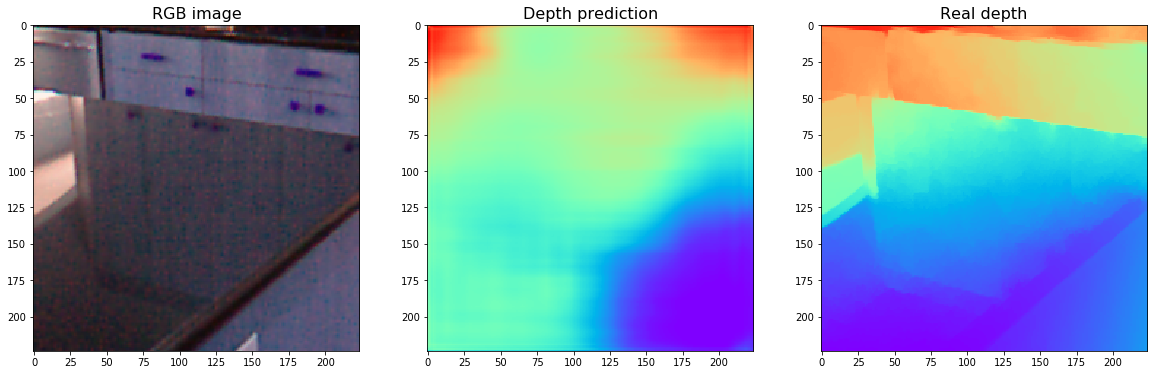

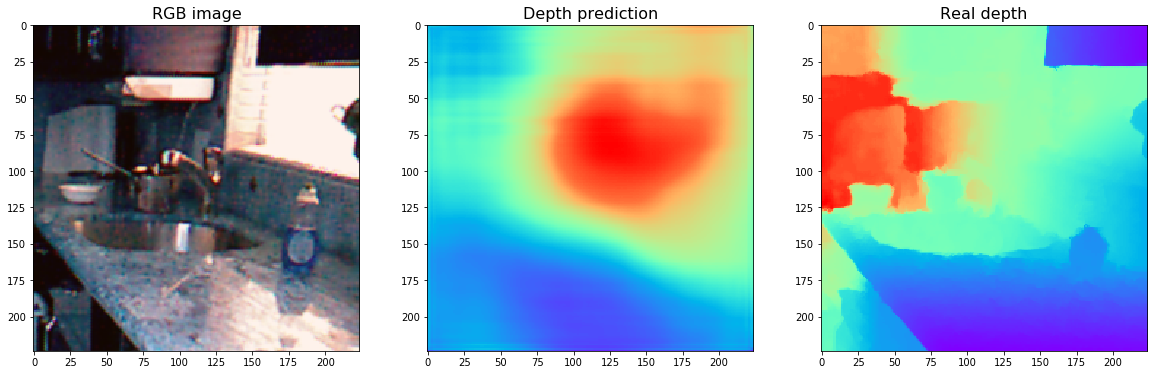

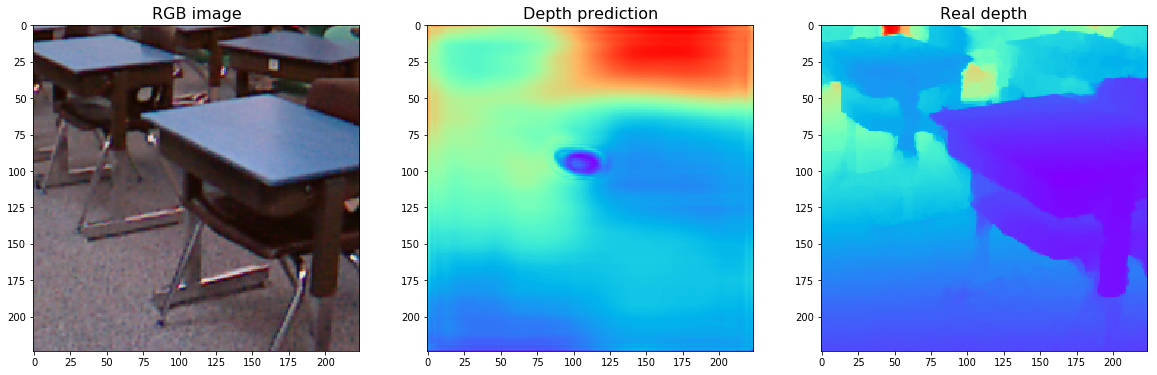

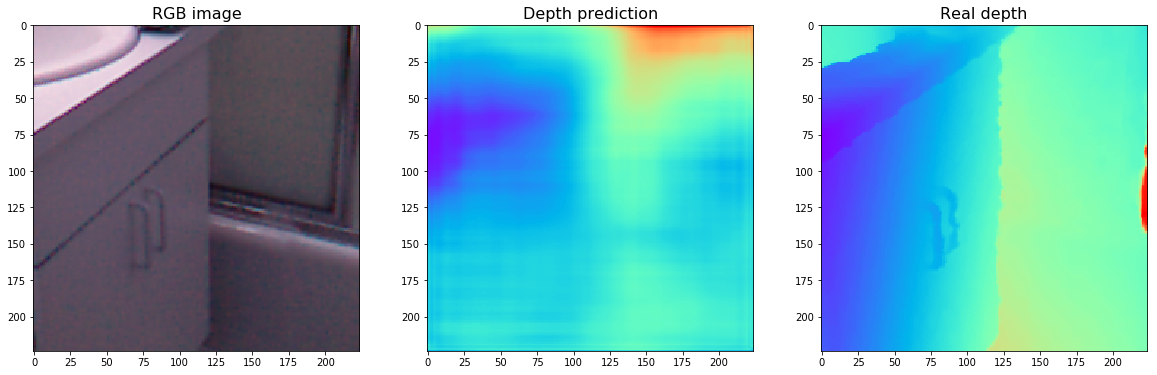

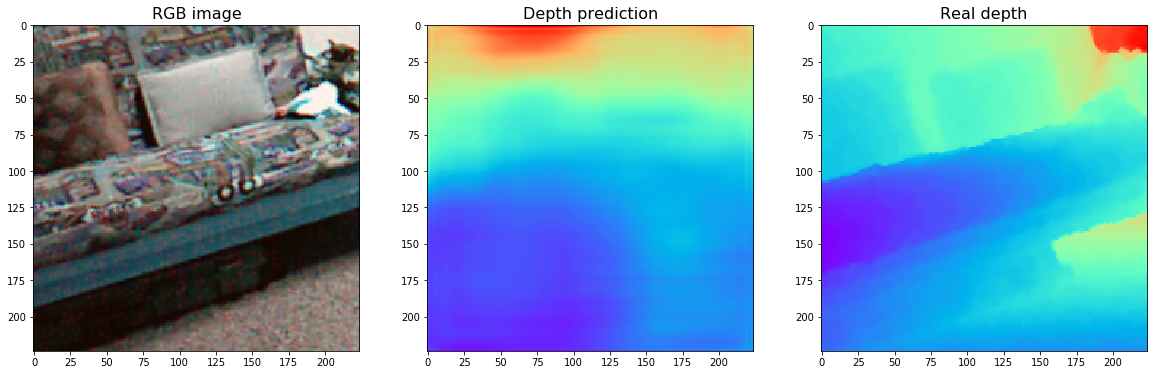

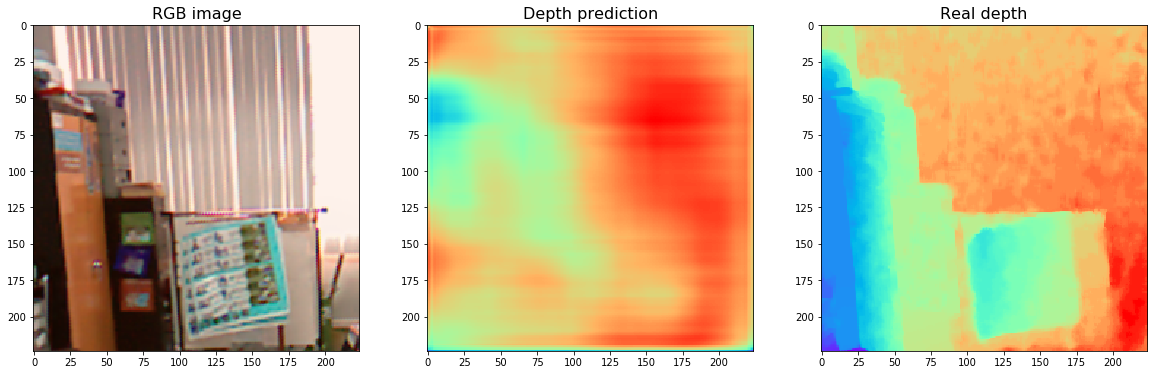

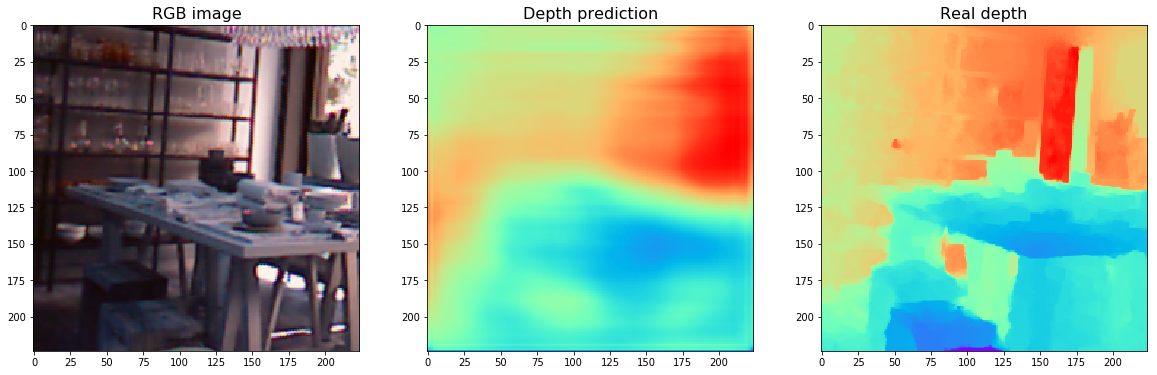

In [24]:
result_id = best_results[0]
best_epoch = val_losses[result_id].argmin()
param = params_list[result_id]
save_dir = '/home/kmouraviev/FCRN_notebooks/train_log_depth_{}_lr{}_decay{}'.format(param['solver'],
                                                                                    param['lr'],
                                                                                    param['decay']
                                                                                    )
#with tf.device('/cpu:0'):
print(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
model = load_model(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
depth_prediction = np.exp(model.predict(rgbs_val) - 1e-2)
print('MSE:', np.mean((depth_prediction - depths_val) ** 2))
print('Log MSE', np.mean((np.log(depth_prediction + 1e-2) - np.log(depths_val + 1e-2)) ** 2))
for i in range(len(rgbs_val)):
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    plt.title('RGB image', fontsize=16)
    plt.imshow(unpreprocess(rgbs_val[i]))
    plt.subplot(1, 3, 2)
    plt.title('Depth prediction', fontsize=16)
    plt.imshow(depth_prediction[i] / 10., cmap='rainbow')
    plt.subplot(1, 3, 3)
    plt.title('Real depth', fontsize=16)
    plt.imshow(depths_val[i] / 10., cmap='rainbow')

### Adam solver, lr=1e-4, decay=1e-5

/home/kmouraviev/FCRN_notebooks/train_log_depth_adam_lr0.0001_decay1e-05/model_on_epoch20.hdf5
MSE: 1.0610566756070803
Log MSE 0.1301851522070513


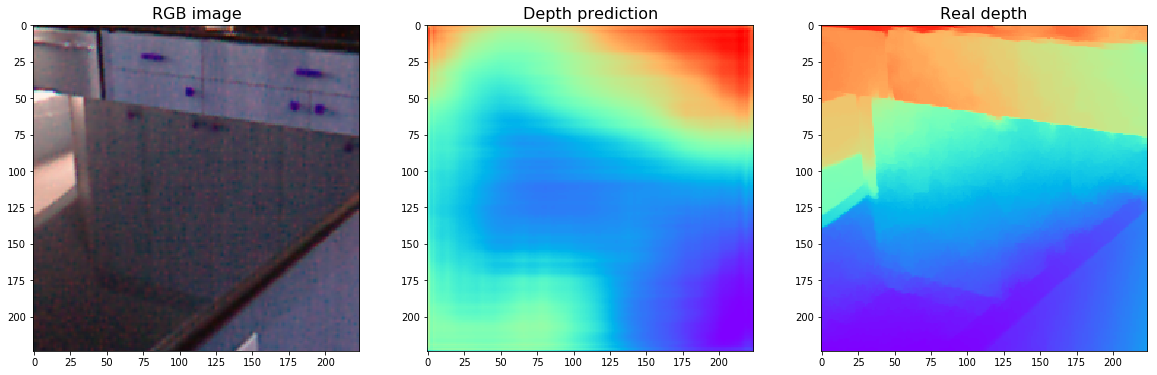

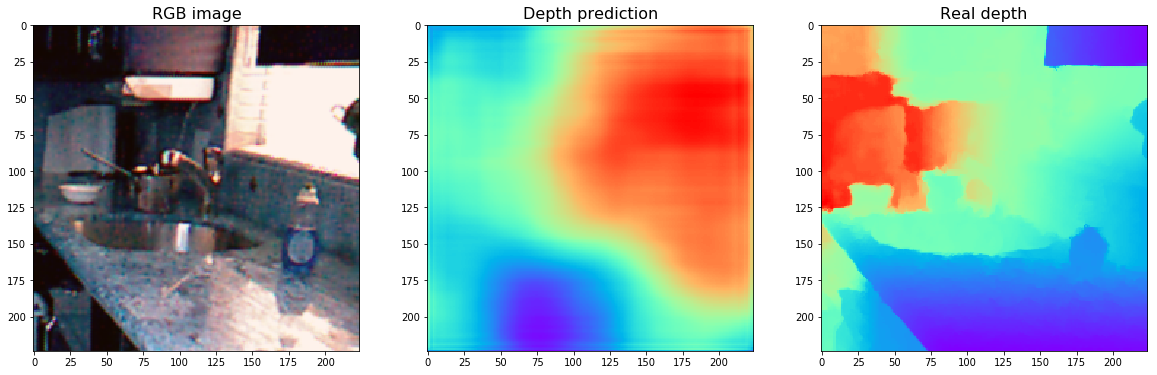

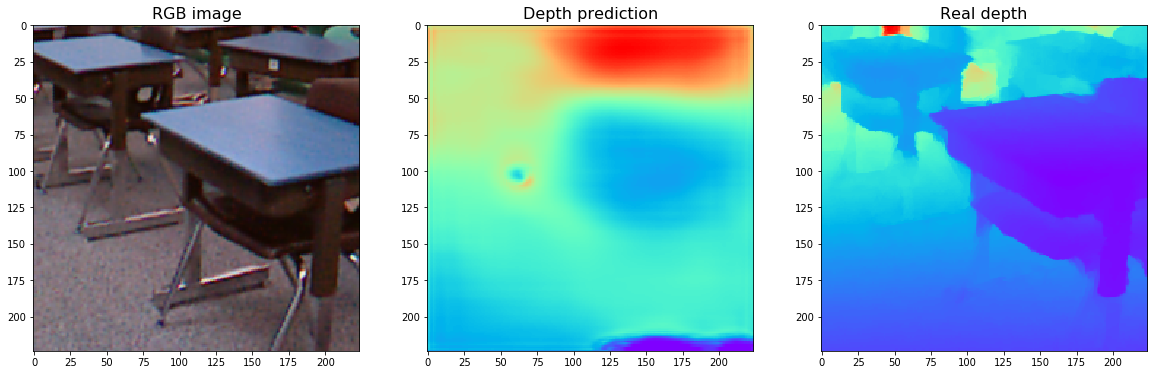

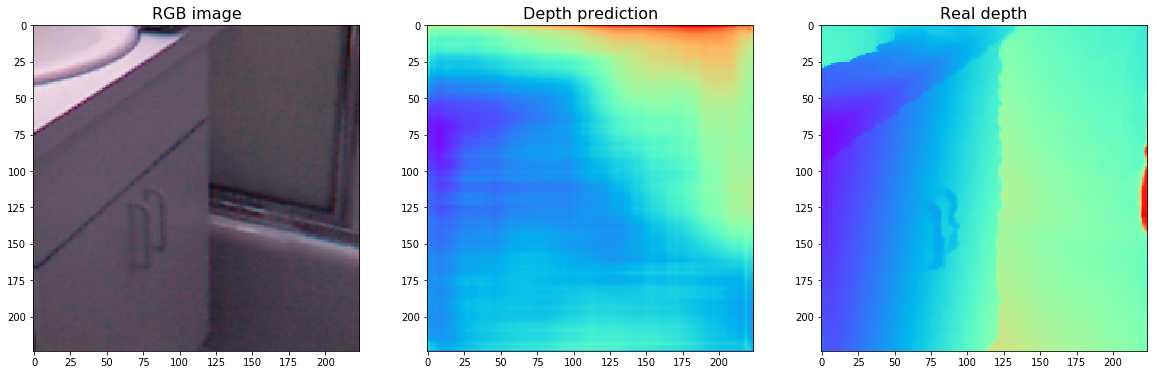

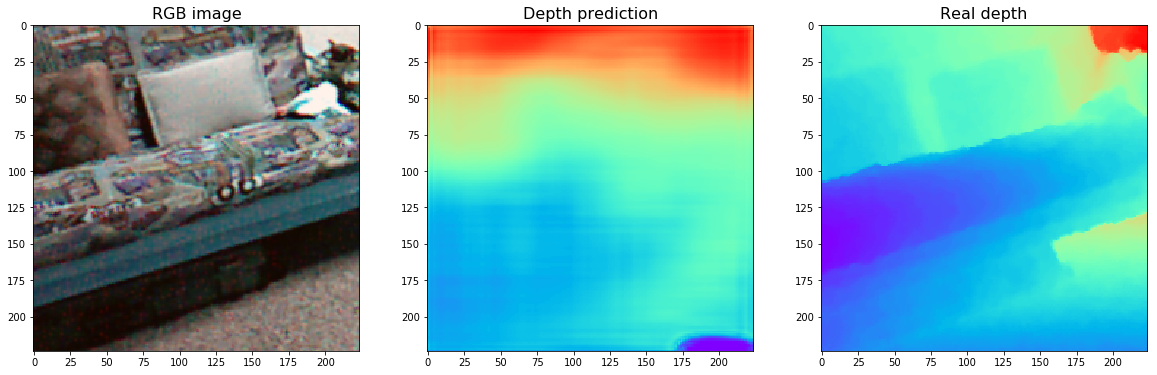

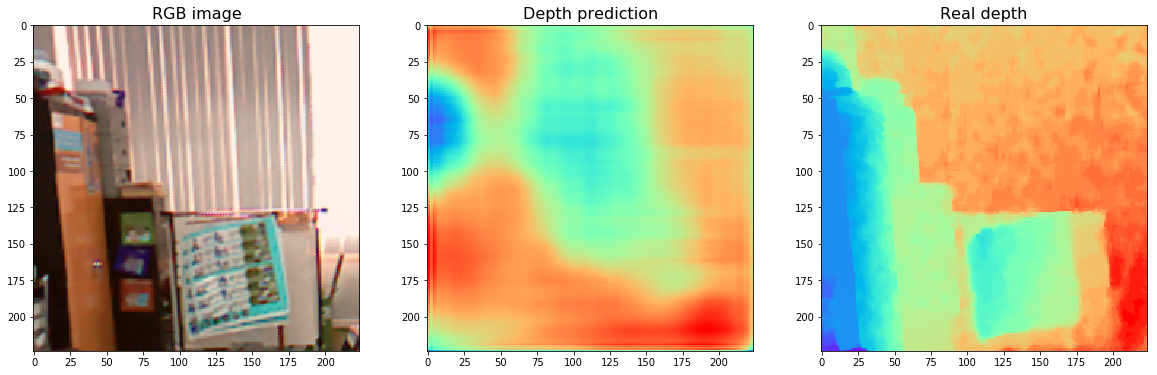

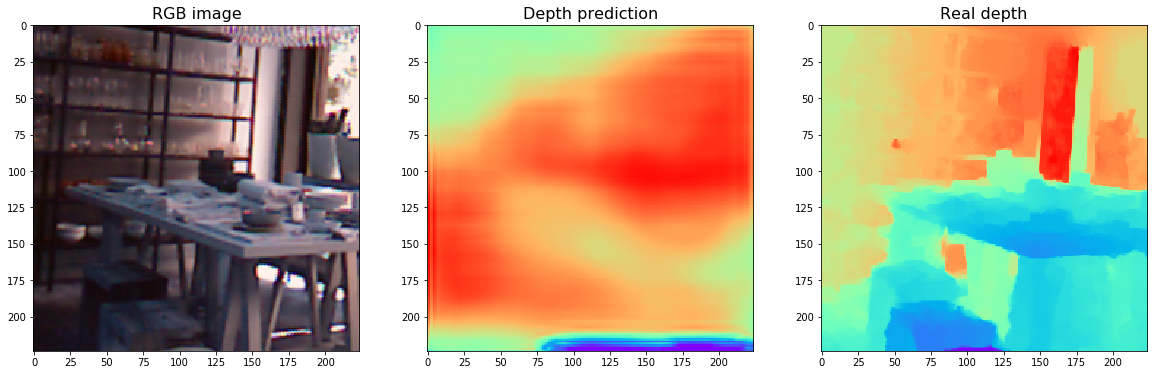

In [25]:
result_id = best_results[1]
best_epoch = val_losses[result_id].argmin()
param = params_list[result_id]
save_dir = '/home/kmouraviev/FCRN_notebooks/train_log_depth_{}_lr{}_decay{}'.format(param['solver'],
                                                                                    param['lr'],
                                                                                    param['decay']
                                                                                    )
#with tf.device('/cpu:0'):
print(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
model = load_model(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
depth_prediction = np.exp(model.predict(rgbs_val) - 1e-2)
print('MSE:', np.mean((depth_prediction - depths_val) ** 2))
print('Log MSE', np.mean((np.log(depth_prediction + 1e-2) - np.log(depths_val + 1e-2)) ** 2))
for i in range(len(rgbs_val)):
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    plt.title('RGB image', fontsize=16)
    plt.imshow(unpreprocess(rgbs_val[i]))
    plt.subplot(1, 3, 2)
    plt.title('Depth prediction', fontsize=16)
    plt.imshow(depth_prediction[i] / 10., cmap='rainbow')
    plt.subplot(1, 3, 3)
    plt.title('Real depth', fontsize=16)
    plt.imshow(depths_val[i] / 10., cmap='rainbow')

### Adam solver, lr=1e-4, decay=1e-4

/home/kmouraviev/FCRN_notebooks/train_log_depth_adam_lr0.0001_decay0.0001/model_on_epoch14.hdf5
MSE: 1.0391813923639475
Log MSE 0.14253899277585316


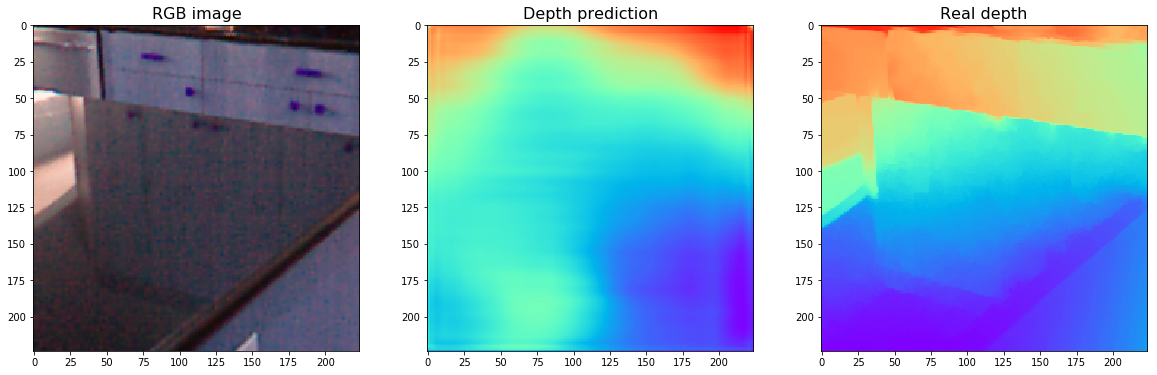

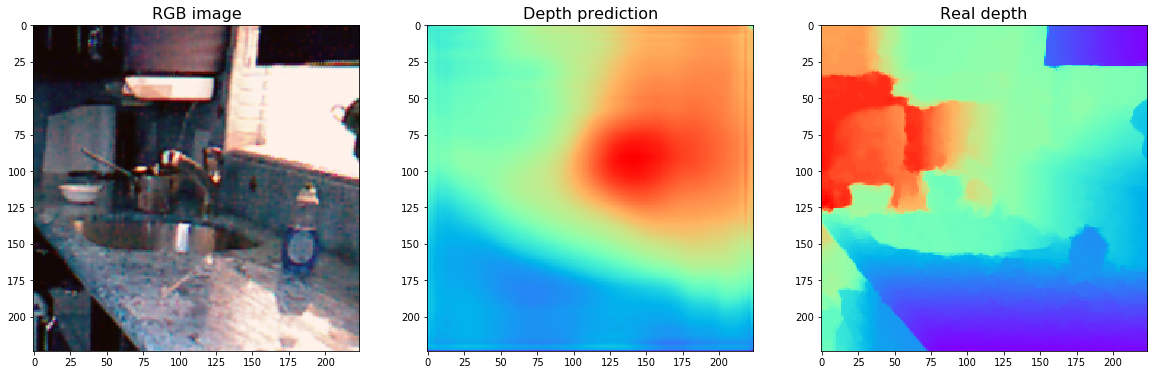

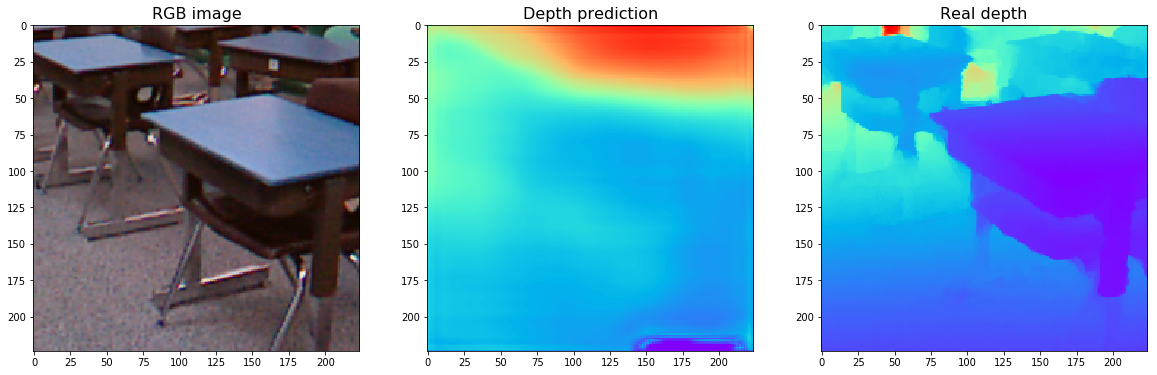

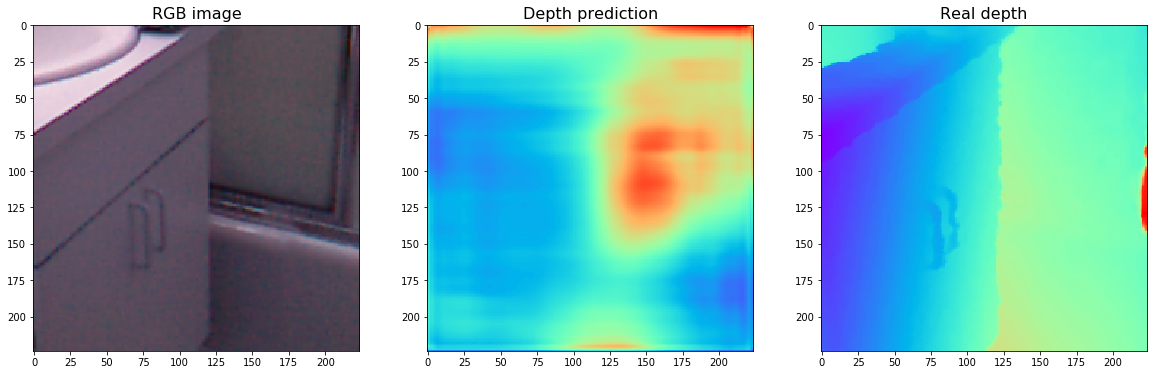

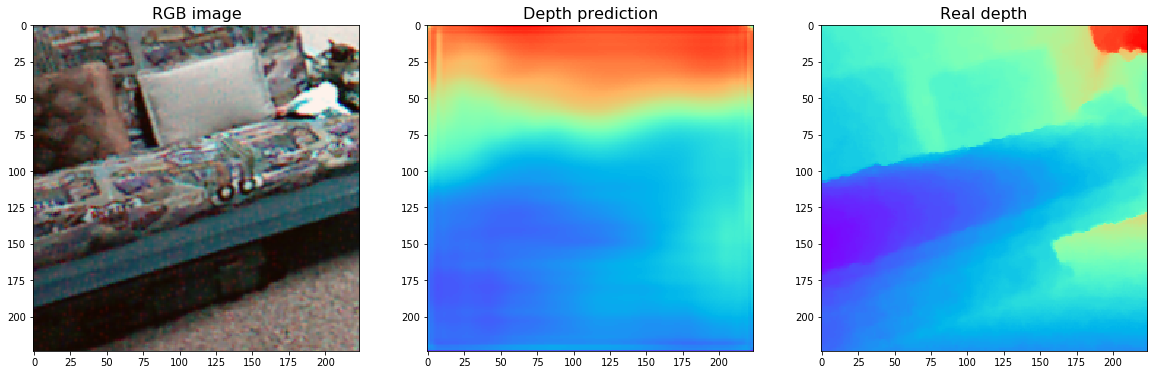

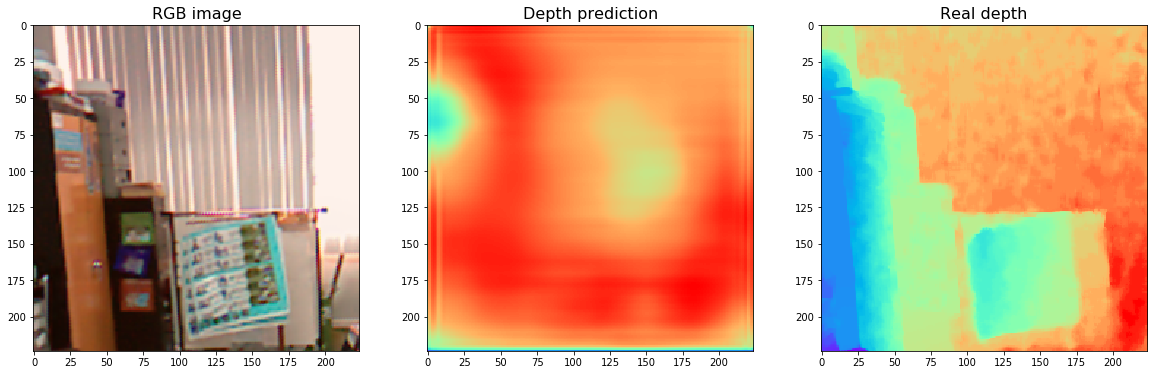

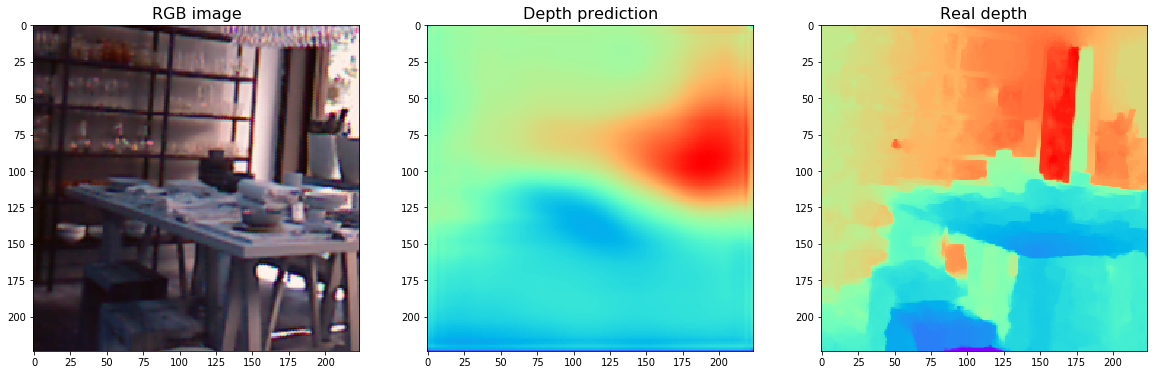

In [26]:
result_id = best_results[2]
best_epoch = val_losses[result_id].argmin()
param = params_list[result_id]
save_dir = '/home/kmouraviev/FCRN_notebooks/train_log_depth_{}_lr{}_decay{}'.format(param['solver'],
                                                                                    param['lr'],
                                                                                    param['decay']
                                                                                    )
#with tf.device('/cpu:0'):
print(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
model = load_model(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
depth_prediction = np.exp(model.predict(rgbs_val) - 1e-2)
print('MSE:', np.mean((depth_prediction - depths_val) ** 2))
print('Log MSE', np.mean((np.log(depth_prediction + 1e-2) - np.log(depths_val + 1e-2)) ** 2))
for i in range(len(rgbs_val)):
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    plt.title('RGB image', fontsize=16)
    plt.imshow(unpreprocess(rgbs_val[i]))
    plt.subplot(1, 3, 2)
    plt.title('Depth prediction', fontsize=16)
    plt.imshow(depth_prediction[i] / 10., cmap='rainbow')
    plt.subplot(1, 3, 3)
    plt.title('Real depth', fontsize=16)
    plt.imshow(depths_val[i] / 10., cmap='rainbow')

### Adam solver, lr=1e-3, decay=1e-5

/home/kmouraviev/FCRN_notebooks/train_log_depth_adam_lr0.001_decay1e-05/model_on_epoch18.hdf5
MSE: 1.131143712790817
Log MSE 0.14650936847461593


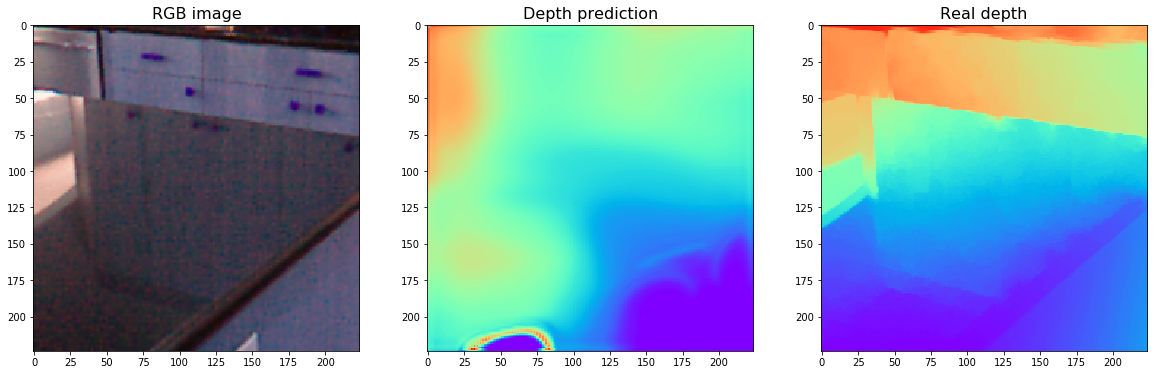

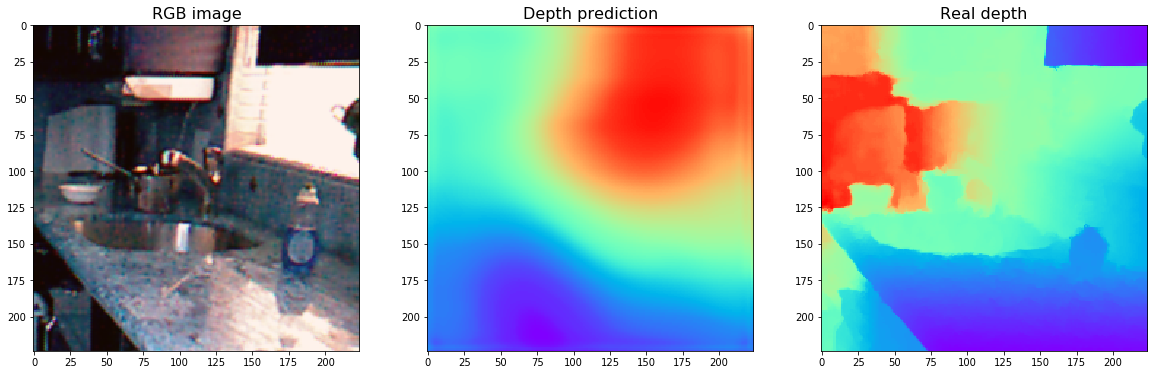

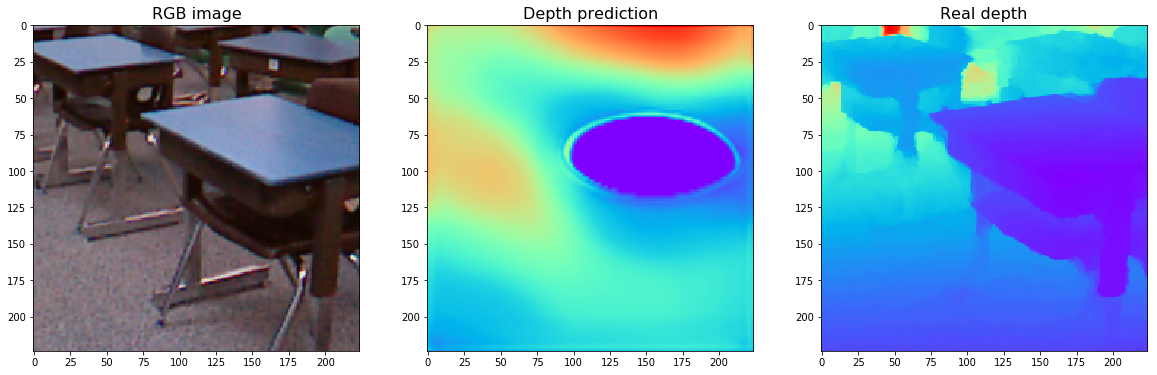

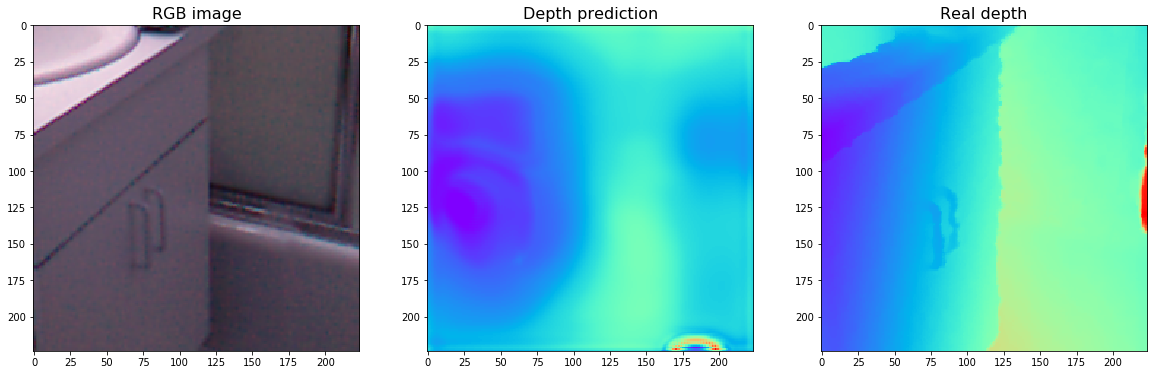

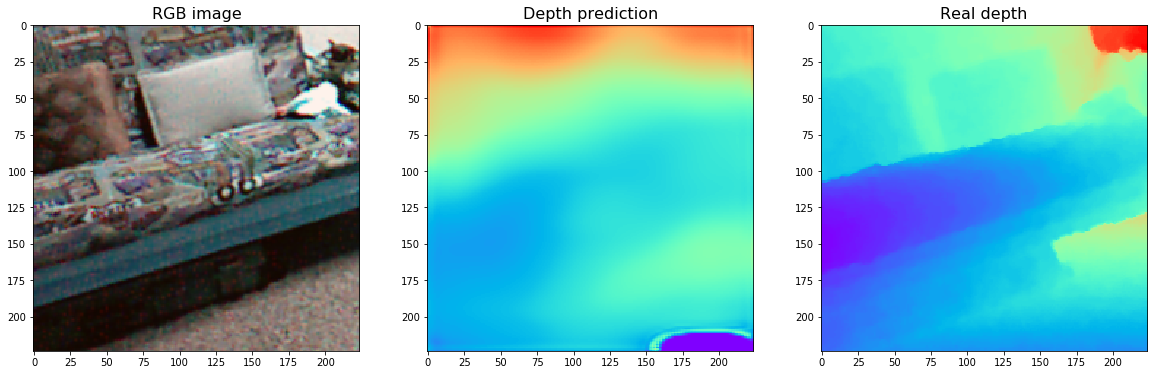

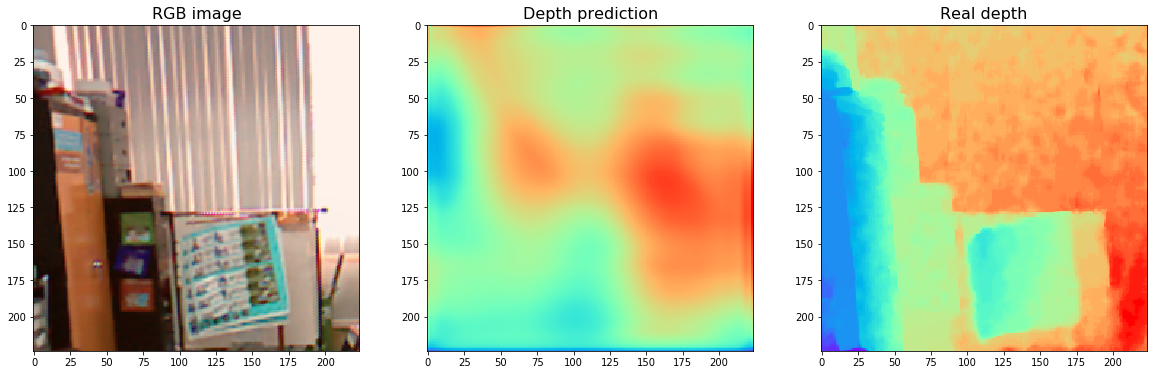

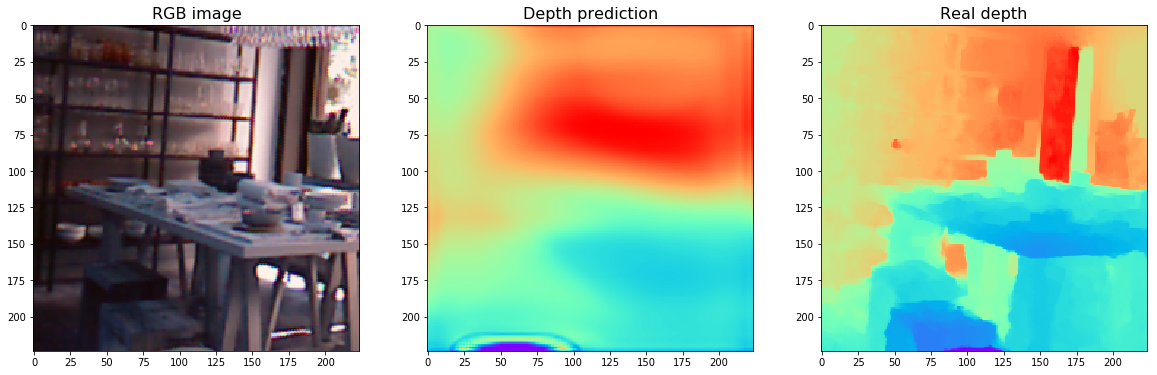

In [27]:
result_id = best_results[3]
best_epoch = val_losses[result_id].argmin()
param = params_list[result_id]
save_dir = '/home/kmouraviev/FCRN_notebooks/train_log_depth_{}_lr{}_decay{}'.format(param['solver'],
                                                                                    param['lr'],
                                                                                    param['decay']
                                                                                    )
#with tf.device('/cpu:0'):
print(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
model = load_model(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
depth_prediction = np.exp(model.predict(rgbs_val) - 1e-2)
print('MSE:', np.mean((depth_prediction - depths_val) ** 2))
print('Log MSE', np.mean((np.log(depth_prediction + 1e-2) - np.log(depths_val + 1e-2)) ** 2))
for i in range(len(rgbs_val)):
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    plt.title('RGB image', fontsize=16)
    plt.imshow(unpreprocess(rgbs_val[i]))
    plt.subplot(1, 3, 2)
    plt.title('Depth prediction', fontsize=16)
    plt.imshow(depth_prediction[i] / 10., cmap='rainbow')
    plt.subplot(1, 3, 3)
    plt.title('Real depth', fontsize=16)
    plt.imshow(depths_val[i] / 10., cmap='rainbow')

### Adam solver, lr =1e-3, decay=1e-6

/home/kmouraviev/FCRN_notebooks/train_log_depth_adam_lr0.001_decay1e-06/model_on_epoch20.hdf5
MSE: 1.0775445048001937
Log MSE 0.14258804080046938


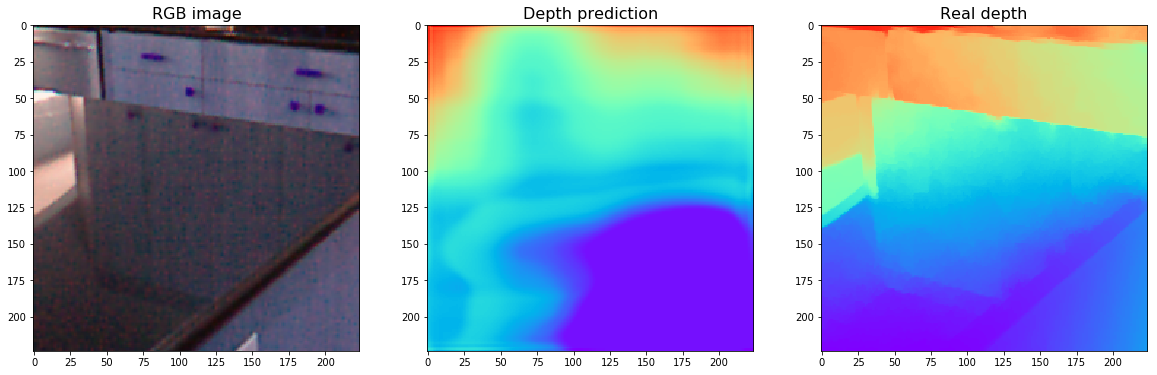

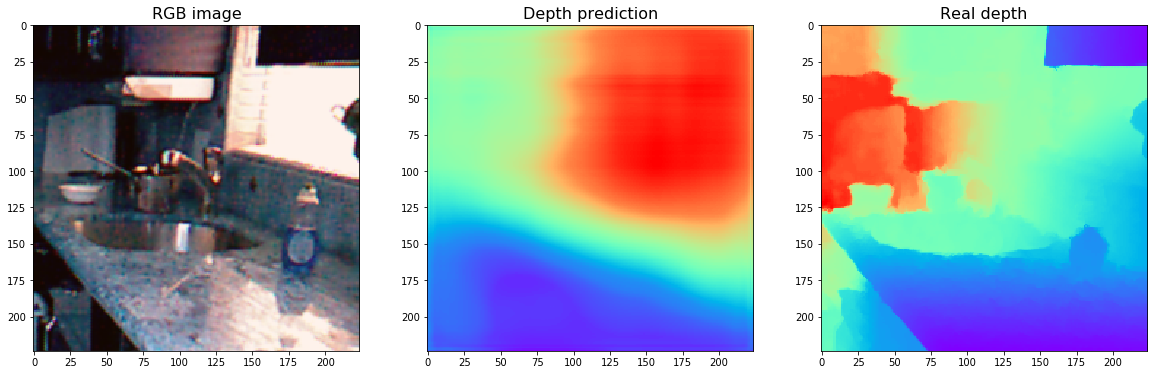

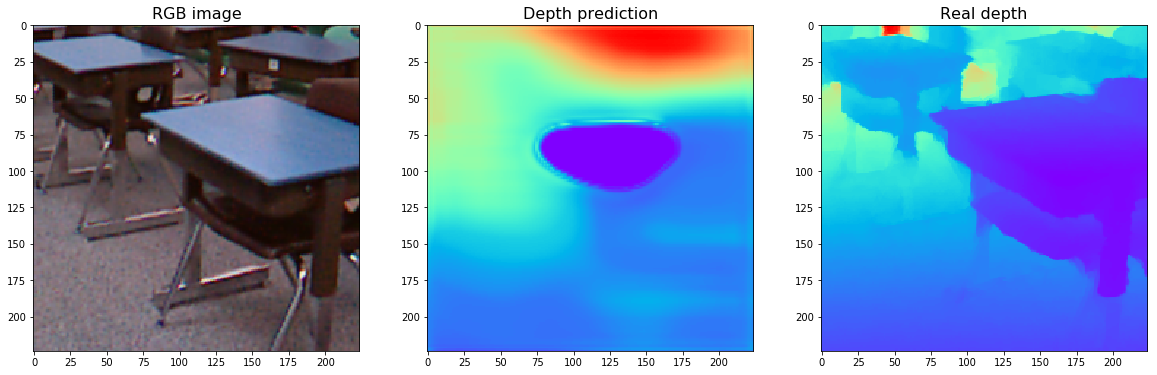

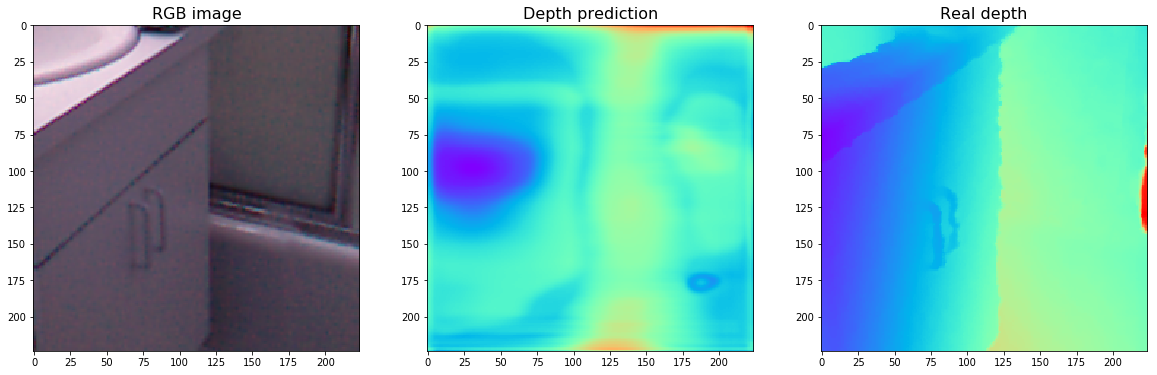

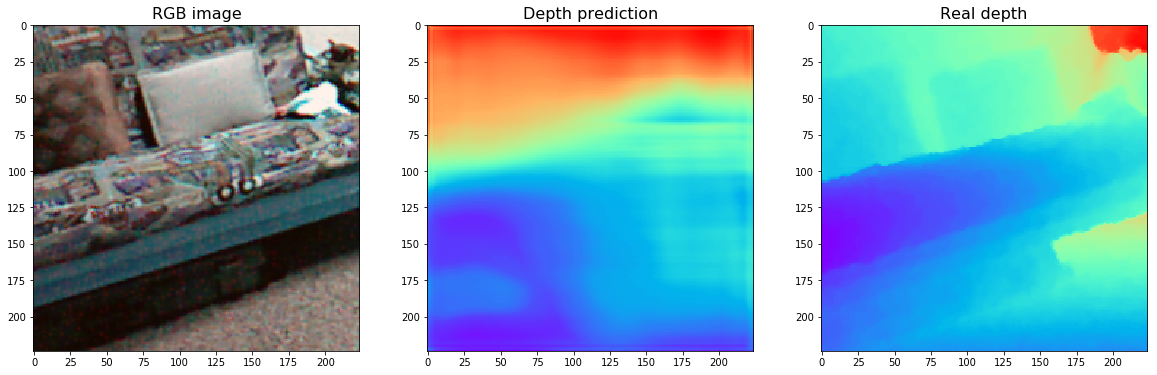

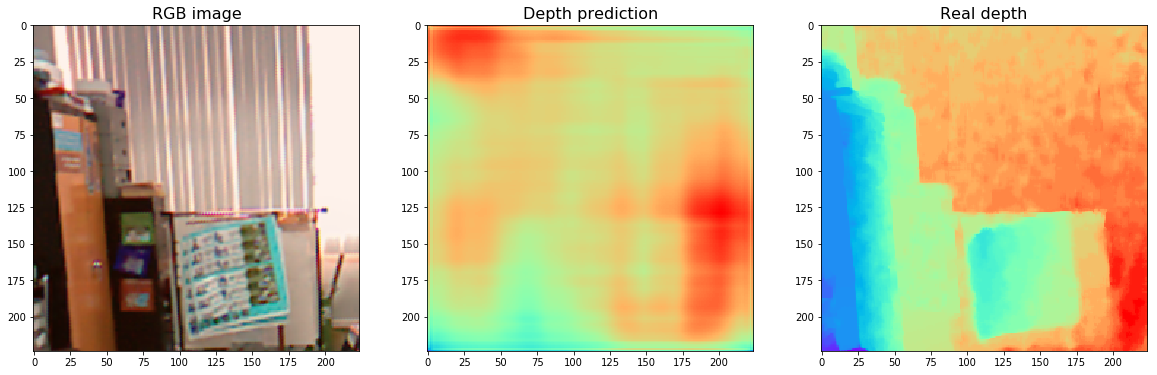

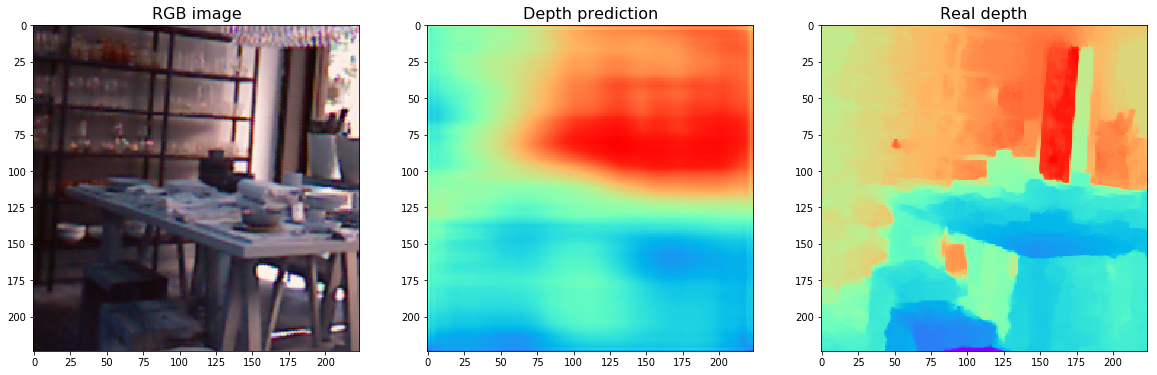

In [28]:
result_id = best_results[4]
best_epoch = val_losses[result_id].argmin()
param = params_list[result_id]
save_dir = '/home/kmouraviev/FCRN_notebooks/train_log_depth_{}_lr{}_decay{}'.format(param['solver'],
                                                                                    param['lr'],
                                                                                    param['decay']
                                                                                    )
#with tf.device('/cpu:0'):
print(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
model = load_model(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
depth_prediction = np.exp(model.predict(rgbs_val) - 1e-2)
print('MSE:', np.mean((depth_prediction - depths_val) ** 2))
print('Log MSE', np.mean((np.log(depth_prediction + 1e-2) - np.log(depths_val + 1e-2)) ** 2))
for i in range(len(rgbs_val)):
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    plt.title('RGB image', fontsize=16)
    plt.imshow(unpreprocess(rgbs_val[i]))
    plt.subplot(1, 3, 2)
    plt.title('Depth prediction', fontsize=16)
    plt.imshow(depth_prediction[i] / 10., cmap='rainbow')
    plt.subplot(1, 3, 3)
    plt.title('Real depth', fontsize=16)
    plt.imshow(depths_val[i] / 10., cmap='rainbow')